###### NBA Players Clustering

Types of Clusters implemented:
    * K-Means
    * Agglomerative Clustering
    * DBSCAN

In [1]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal
from scipy import stats
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 9)

dataset = pd.read_csv("players_stats.csv")
dataset.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [2]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = dataset[["TOV", "PF"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)

[0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1
 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1
 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1
 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0
 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1
 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 1 1 1 0]


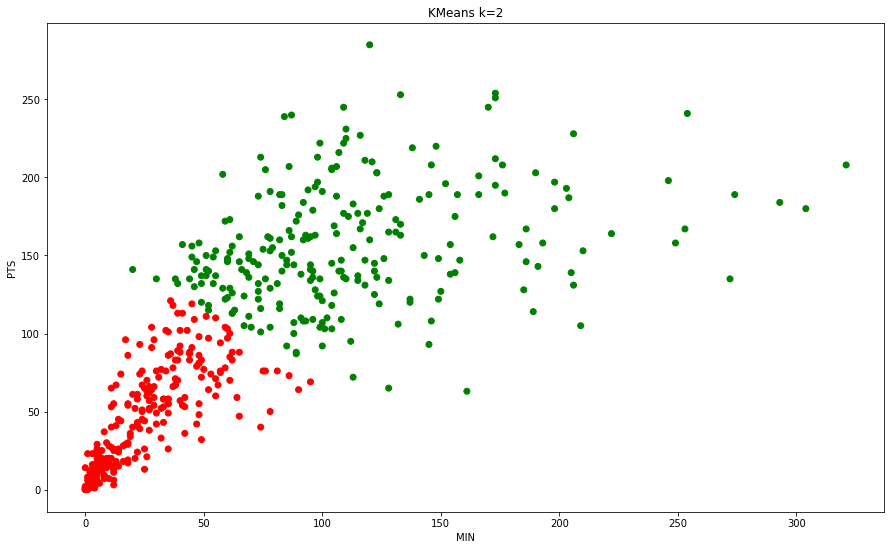

In [3]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(dataset['TOV'], dataset['PF'], c=colors)
plt.title("KMeans k=2")
plt.xlabel("MIN")
plt.ylabel("PTS")
plt.show()

[2 0 2 2 1 1 0 2 2 0 2 0 0 2 2 0 0 2 2 1 0 0 0 2 2 0 2 1 2 1 0 0 2 2 0 0 2
 0 0 2 0 0 2 0 1 0 0 0 0 0 2 0 0 2 2 2 1 2 2 0 2 0 0 0 0 2 0 0 2 0 0 0 2 2
 2 0 1 2 2 0 2 2 2 0 0 0 2 0 0 0 2 1 2 0 2 1 0 2 2 2 2 0 0 2 2 0 1 2 0 1 0
 0 0 1 0 0 0 2 2 0 1 0 0 2 2 1 2 2 2 0 2 1 2 2 1 2 1 2 2 2 1 1 0 2 0 2 0 1
 2 2 2 2 2 2 2 0 0 0 2 1 2 2 2 2 1 1 1 2 1 2 2 0 0 0 2 0 2 0 2 0 0 2 0 2 0
 2 2 2 0 2 2 0 0 2 1 0 2 2 2 2 2 2 0 0 2 0 2 2 0 0 0 2 2 2 0 1 2 2 2 2 2 2
 0 2 2 0 2 1 0 0 1 0 2 0 1 2 2 2 2 0 2 2 2 1 2 2 0 1 2 0 2 2 0 2 0 2 1 0 0
 2 2 2 0 2 1 0 0 2 2 1 0 0 2 0 0 1 0 0 1 2 0 1 0 0 2 0 2 1 1 2 0 1 1 0 2 2
 0 2 2 0 2 1 2 2 2 0 0 2 0 2 2 0 2 0 1 1 0 0 0 2 0 2 1 0 2 0 0 0 2 2 2 0 2
 0 0 1 0 2 2 0 0 2 2 2 0 1 2 2 2 0 1 2 0 2 2 0 2 0 2 1 2 0 0 2 1 0 0 2 0 2
 0 2 1 2 1 0 2 2 2 2 0 0 2 0 0 2 2 0 0 2 2 2 1 2 0 2 2 2 0 2 0 2 0 2 2 0 1
 1 2 1 0 2 2 2 2 2 1 2 2 0 2 0 2 0 2 2 2 2 2 2 0 2 0 1 0 2 0 0 0 0 0 0 0 1
 0 0 1 2 0 1 2 1 2 0 0 2 2 2 2 1 0 0 1 2 1 2 0 2 1 1 2 1 2 2 2 1 2 0 0 0 2
 2 2 2 1 2 0 1 0 2]


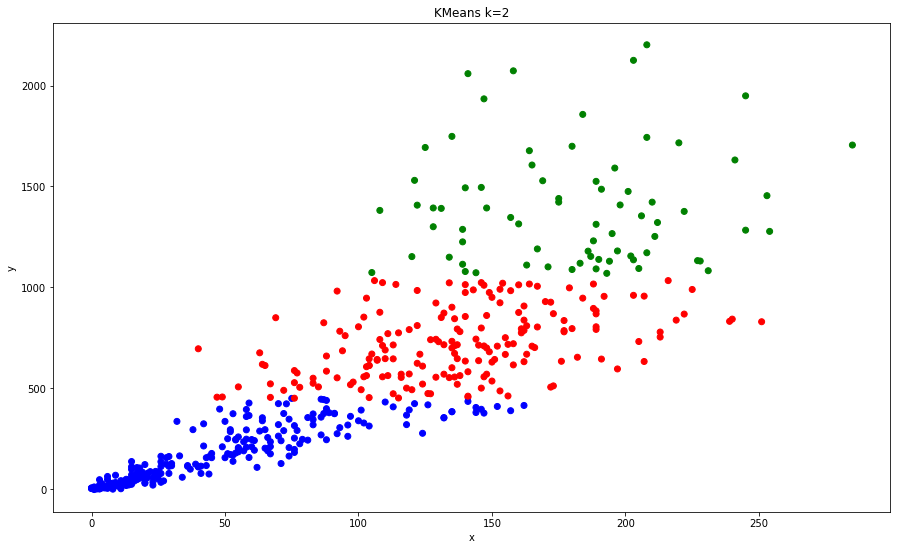

In [4]:
estimator = KMeans(n_clusters=3)
X = dataset[["PF", "EFF"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)
colors = set_colors(labels)
plt.scatter(dataset['PF'], dataset['EFF'], c=colors)
plt.title("KMeans k=2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
def annulus(inner_radius, outer_radius, n=30, color='b'):
    """Generate n points with class `color` between the inner radius and the outer radius."""
    data = []
    diff = outer_radius - inner_radius
    for _ in range(n):
        # Pick an angle and radius
        angle = 2 * np.pi * random.random()
        r = inner_radius + diff * random.random()
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        data.append((x, y))
    # Return a data frame for convenience
    xs, ys = zip(*data)
    df = pd.DataFrame()
    df["x"] = xs
    df["y"] = ys
    df["color"] = color
    return df

df1 = annulus(2, 6, 200, color='r')
df2 = annulus(8, 10, 300, color='g')
df_circ = pd.concat([df1, df2])

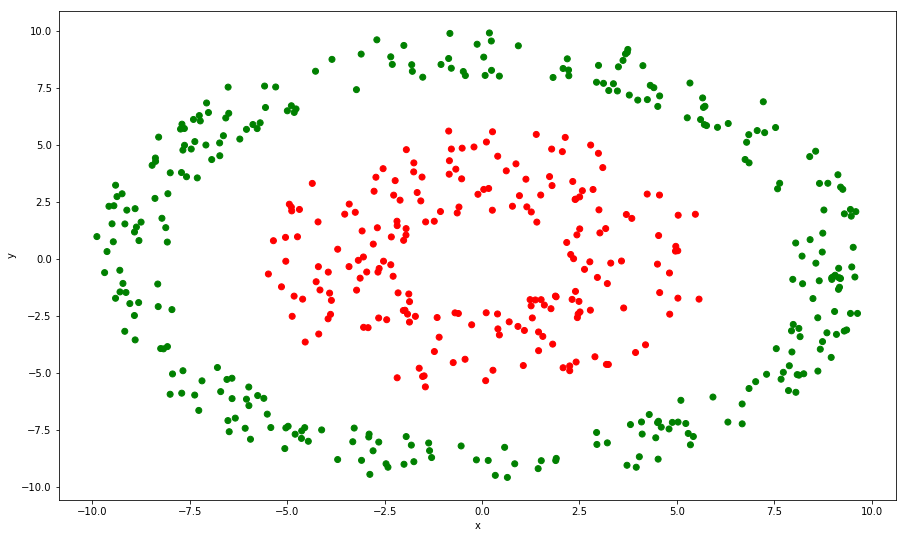

In [6]:
plt.scatter(df_circ['x'], df_circ['y'], c=df_circ['color'])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

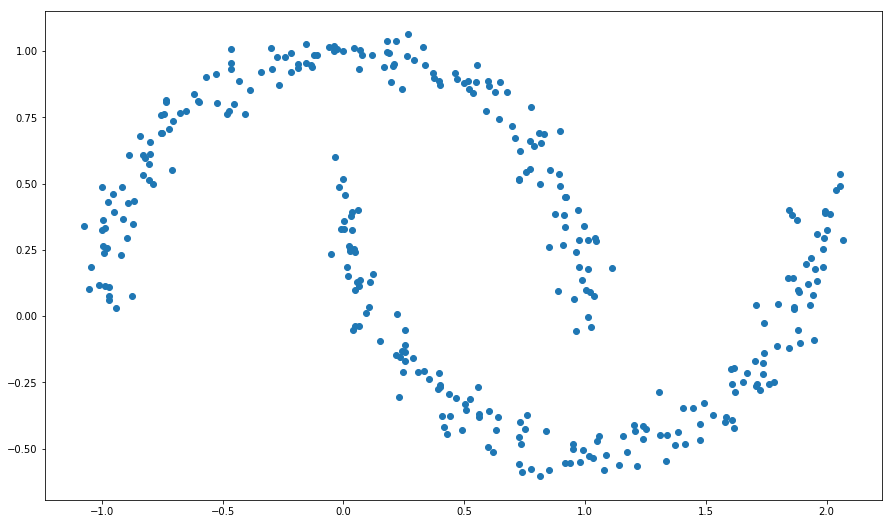

In [7]:
from sklearn.datasets import make_moons
xs, ys = make_moons(333, noise=.055, random_state=0)
plt.scatter(xs[:, 0], xs[:, 1])

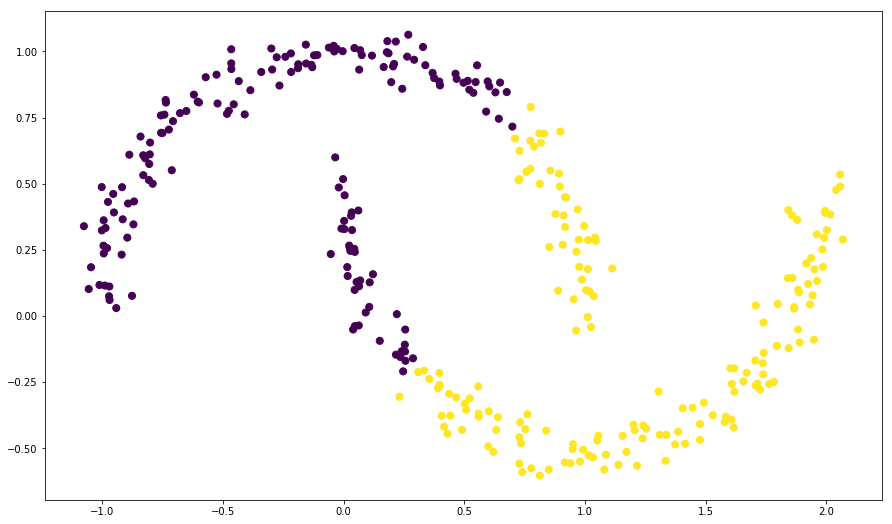

In [8]:
labels = KMeans(2, random_state=0).fit_predict(xs)
plt.scatter(xs[:, 0], xs[:, 1], c=labels,
            s=50, cmap='viridis');

Counter({4: 105, 2: 78, 7: 68, 8: 60, 5: 57, 3: 38, 0: 34, 9: 32, 1: 16, 6: 2})


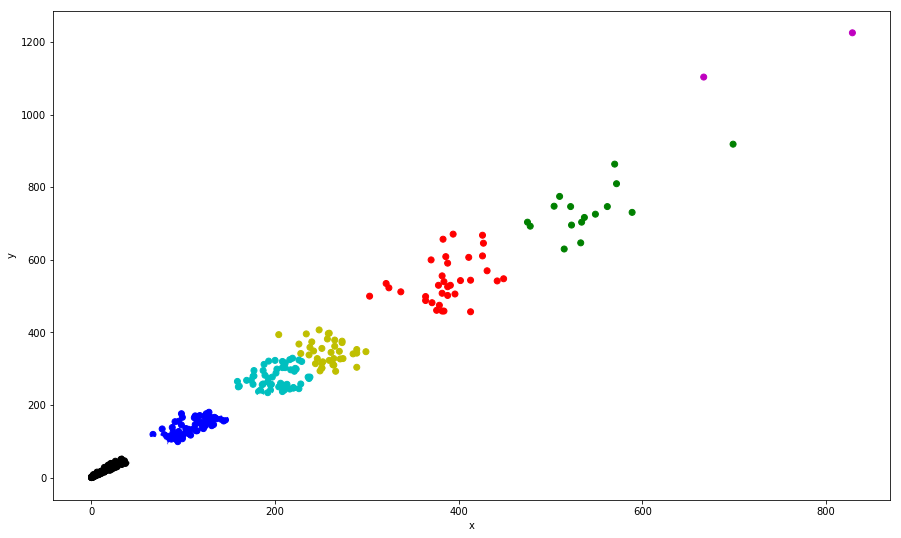

In [9]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=10)
X = dataset[["DREB", "REB"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(dataset['DREB'], dataset['REB'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()